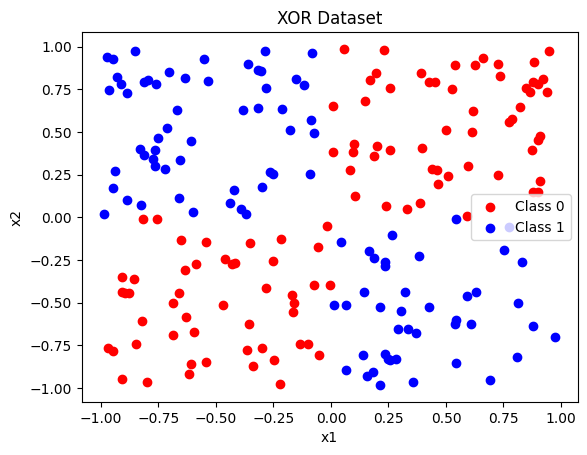

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = np.random.uniform(-1, 1, (400, 2))
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)  # XOR condition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color="red", label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color="blue", label="Class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("XOR Dataset")
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, solver='adam', random_state=42)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))


MLP Accuracy: 0.99


d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_score_l1 = 0
best_mlp_l1 = None
penalties = [0.0001, 0.001, 0.01, 0.1]

for alpha in penalties:
    mlp_l1 = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, alpha=alpha, random_state=42, solver="adam")
    mlp_l1.fit(X_train, y_train)
    score = accuracy_score(y_test, mlp_l1.predict(X_test))
    if score > best_score_l1:
        best_score_l1 = score
        best_mlp_l1 = mlp_l1

print("Best MLP L1 Accuracy:", best_score_l1)


d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best MLP L1 Accuracy: 0.99


d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_score_l2 = 0
best_mlp_l2 = None

for alpha in penalties:
    mlp_l2 = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, alpha=alpha, random_state=42, solver="adam")
    mlp_l2.fit(X_train, y_train)
    score = accuracy_score(y_test, mlp_l2.predict(X_test))
    if score > best_score_l2:
        best_score_l2 = score
        best_mlp_l2 = mlp_l2

print("Best MLP L2 Accuracy:", best_score_l2)


d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best MLP L2 Accuracy: 0.99


d:\AKASH.O\PYTHON\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_logreg = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
poly_logreg.fit(X_train, y_train)

y_pred_poly_logreg = poly_logreg.predict(X_test)
print("Polynomial Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_poly_logreg))


Polynomial Logistic Regression Accuracy: 0.95


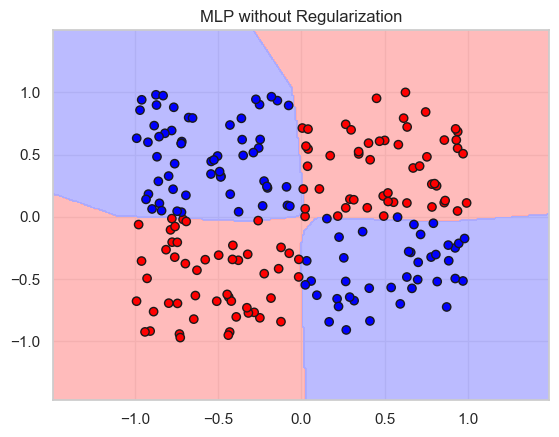

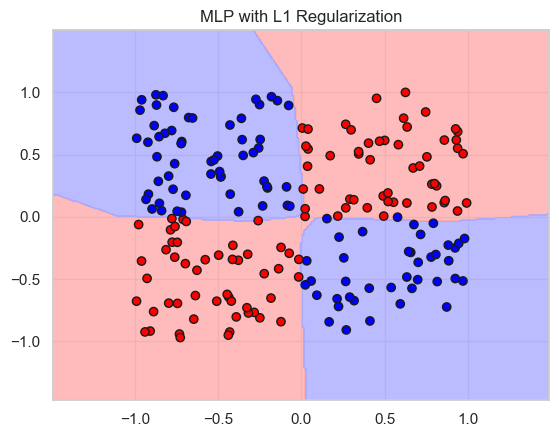

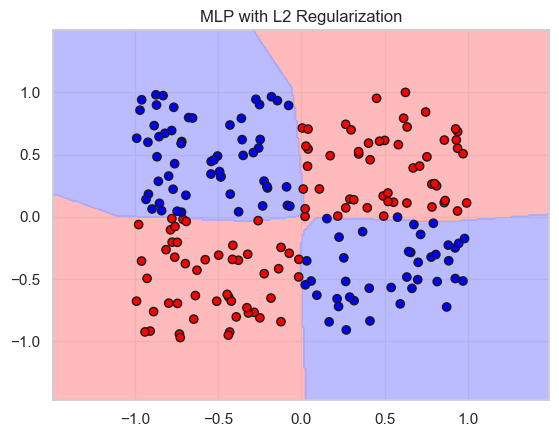

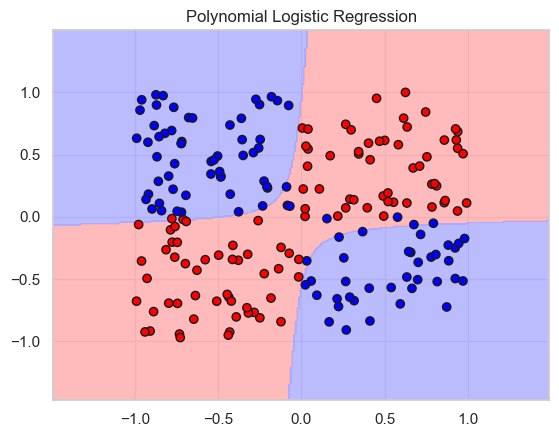

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.show()

plot_decision_boundary(mlp, X_test, y_test, "MLP without Regularization")
plot_decision_boundary(best_mlp_l1, X_test, y_test, "MLP with L1 Regularization")
plot_decision_boundary(best_mlp_l2, X_test, y_test, "MLP with L2 Regularization")
plot_decision_boundary(poly_logreg, X_test, y_test, "Polynomial Logistic Regression")
